In [1]:
%tensorflow_version 2.x

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Import the dataset

In [4]:
df_car = pd.read_csv('/content/USA_cars_datasets.csv')

# Exploring Dataset

In [5]:
"""check data type, shape and 'null' values of the dataframe"""
print(df_car.dtypes)  #column data types
print("=" * 10)
print(df_car.shape)   # size of the dataframe
print("=" * 10)
print(df_car.isnull().sum()) #check 'Null' values

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object
(2499, 13)
Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64


In [6]:
df_car.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [7]:
df_car.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


# Cleaning and Pre Processing of the Data

In [8]:
df_car.condition.value_counts()

2 days left        832
21 hours left      492
3 days left        137
14 hours left      108
1 days left         91
8 days left         82
17 hours left       76
20 hours left       67
9 days left         58
22 hours left       57
6 days left         52
18 hours left       48
19 hours left       45
7 days left         43
11 days left        42
16 hours left       36
2 hours left        26
10 days left        23
Listing Expired     20
29 minutes          18
23 hours left       16
4 days left         16
5 hours left        16
1 minutes           15
6 hours left        12
24 hours left        9
12 days left         8
15 hours left        8
34 minutes           7
7 hours left         7
5 days left          6
15 days left         4
1 hours left         3
9 minutes            3
48 minutes           2
3 hours left         2
47 minutes           2
13 days left         1
16 minutes           1
53 minutes           1
27 minutes           1
30 minutes           1
32 minutes           1
28 minutes 

We will convert the 'condition' column of string type into int type.
For this, we will convert all the values (days, hours, min) into minutes. 

In [9]:
import tqdm   #ckeck time runs

converted_condition=[]
for i, row in tqdm.tqdm(df_car.iterrows()): #loop through rows
    temp=df_car['condition'][i].split() #spliting strings
    label = temp[1].rstrip() #selecting second value in a string
    
    # transform string to int
    if 'day' in label:
        new_row = int(temp[0].rstrip()) * int(24 * 60) #Convert days to minutes
    elif 'minute' in label:
        new_row = int(temp[0].rstrip()) * int(1) #keep minutes as it is
    elif 'hour' in label:
        new_row = int(temp[0].rstrip()) * int(60) #Convert hours to minutes
    else: # lable others as "-1"
        new_row=-1
        pass
    converted_condition.append(new_row) # store numeric values into a list
    
df_car['converted_condition'] = converted_condition #creating new column with transformed 'condition'

2499it [00:00, 8581.43it/s]


Delete the unwanted columns from the table:
1. Vin : Vehicle Identification Number
2. lot : lot number
3. Unnamed
4. Condition

Above columns do not affect the price of the vehicle.

In [10]:
df_car.drop(labels=['vin','lot','Unnamed: 0','condition'], axis=1)

,price,brand,model,year,title_status,mileage,color,state,country,converted_condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,14400
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,8640
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2880
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,1320
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,1320
...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,usa,1440
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,usa,1260
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,usa,1260
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,usa,2880


In [11]:
"""check data type, shape and 'null' values of the this modified dataset"""
print(df_car.dtypes)  #column data types
print("=" * 10)
print(df_car.shape)   # size of the dataframe
print("=" * 10)
print(df_car.isnull().sum()) #check 'Null' values

Unnamed: 0               int64
price                    int64
brand                   object
model                   object
year                     int64
title_status            object
mileage                float64
color                   object
vin                     object
lot                      int64
state                   object
country                 object
condition               object
converted_condition      int64
dtype: object
(2499, 14)
Unnamed: 0             0
price                  0
brand                  0
model                  0
year                   0
title_status           0
mileage                0
color                  0
vin                    0
lot                    0
state                  0
country                0
condition              0
converted_condition    0
dtype: int64


In [12]:
# Check if all the columns contain values of uniform type
df_car.applymap(type).apply(pd.value_counts).fillna(0)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,converted_condition
<class 'int'>,2499.0,2499.0,0.0,0.0,2499.0,0.0,0.0,0.0,0.0,2499.0,0.0,0.0,0.0,2499.0
<class 'str'>,0.0,0.0,2499.0,2499.0,0.0,2499.0,0.0,2499.0,2499.0,0.0,2499.0,2499.0,2499.0,0.0
<class 'float'>,0.0,0.0,0.0,0.0,0.0,0.0,2499.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_car['brand'].unique(), len(df_car['brand'].unique())

(array(['toyota', 'ford', 'dodge', 'chevrolet', 'gmc', 'chrysler', 'kia',
        'buick', 'infiniti', 'mercedes-benz', 'jeep', 'bmw', 'cadillac',
        'hyundai', 'mazda', 'honda', 'heartland', 'jaguar', 'acura',
        'harley-davidson', 'audi', 'lincoln', 'lexus', 'nissan', 'land',
        'maserati', 'peterbilt', 'ram'], dtype=object), 28)

# Data analysis and Visualization

In [14]:
# Create a subset of the dataframe containing only object type columns
df_cat=df_car.select_dtypes(include='object')
df_cat.columns

Index(['brand', 'model', 'title_status', 'color', 'vin', 'state', 'country',
       'condition'],
      dtype='object')

## First Q: Which brand has the largest number of cars for sale?

In [15]:
# Finding the brand which has most number of cars for sale.
df_cat['brand'].value_counts().index[0]

'ford'

So ford has maximum number of cars listed for the sale

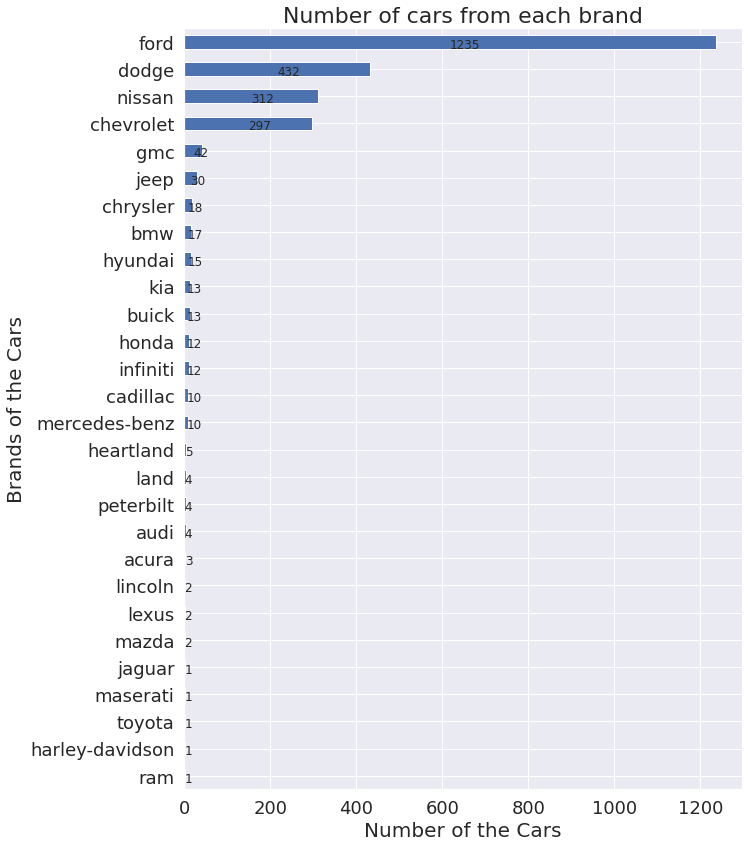

In [16]:
# Ploting the graph of No. of Cars VS Car Brand
sns.set(style="darkgrid")
df_tmp = df_cat['brand'].value_counts().sort_values()
ax = df_tmp.plot(kind='barh',figsize=(10,14))

plt.ylabel('Brands of the Cars', fontsize=20)
plt.xlabel('Number of the Cars', fontsize=20)
plt.title('Number of cars from each brand', fontsize = 22)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

x_offset = -0.03
y_offset = -0.47
for p,val in zip(ax.patches,df_tmp):
    b = p.get_bbox()
    val = "{}".format(val)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

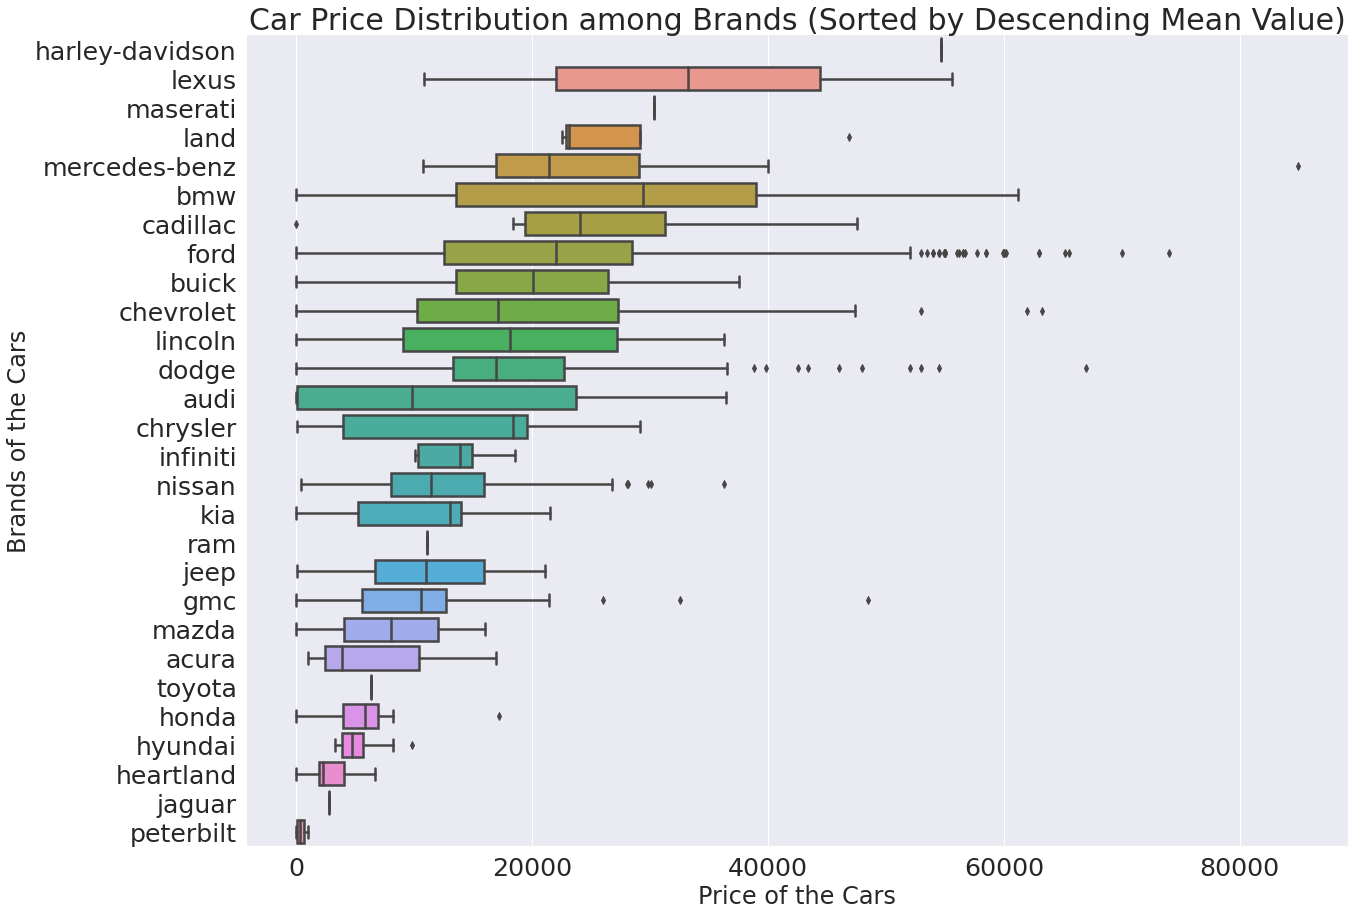

In [17]:
# Boxplotting car_price among brands, sorting by mean_price descending 
df_price_brand=df_car[['brand','price']] #subsetting
sort_index_brand=list(df_price_brand.groupby(['brand']).mean().sort_values(by='price',ascending=False).index) #indexing sorted values

sns.set(font_scale=2.3)
sns.catplot(y="brand",
            x="price", 
            kind="box",            
            height=13, 
            aspect=1.5,
            linewidth=2.5,
            order=sort_index_brand,
            data=df_price_brand)

plt.title('Car Price Distribution among Brands (Sorted by Descending Mean Value)',size=30)
sns.set(style="darkgrid")

plt.ylabel('Brands of the Cars', fontsize=24)
plt.xlabel('Price of the Cars', fontsize=24)

plt.show()

Q2. How is the mileage related to the price?

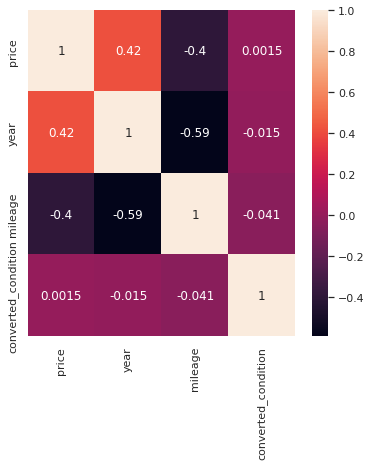

<Figure size 432x288 with 0 Axes>

In [18]:
data_price_year_mileage = df_car[['price','year','mileage','converted_condition']] #subsetting
data_corr=data_price_year_mileage.corr() #calculating Pearson correlation coefficient

#ploting correlation with heatmap
plt.subplots(figsize=(6,6))
sns.heatmap(data_corr,annot=True)
sns.set(font_scale=1.5) 
plt.show()
plt.savefig('corr_heatmap.png')

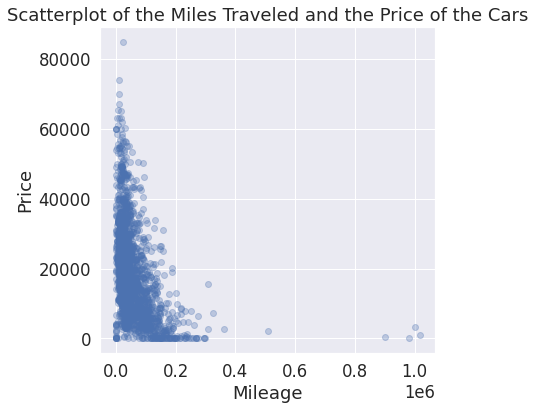

In [19]:
# scatter plot mileage vs. price
plt.figure(figsize=(6,6))
x=data_price_year_mileage['mileage']
y=data_price_year_mileage['price']

# Visualization
plt.scatter(x,y,alpha=0.3)
plt.title('Scatterplot of the Miles Traveled and the Price of the Cars')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [20]:
#eliminating outliers
df_price_mileage=df_car[['price','mileage']]

from scipy import stats   #import scipy library to use delete outliers function
from scipy.stats import norm

#calculate z-scores of `df_price_mileage
z_scores = stats.zscore(df_price_mileage)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  #deleting outliers

# Read up on z-score

In [21]:
type(filtered_entries)

numpy.ndarray

In [22]:
df_price_mileage.head()

,price,mileage
0,6300,274117.0
1,2899,190552.0
2,5350,39590.0
3,25000,64146.0
4,27700,6654.0


In [23]:
df_price_mileage.shape

(2499, 2)

In [24]:
filtered_entries

array([False,  True,  True, ...,  True,  True,  True])

In [25]:
df_price_mileage[filtered_entries]

,price,mileage
1,2899,190552.0
2,5350,39590.0
3,25000,64146.0
4,27700,6654.0
5,5700,45561.0
...,...,...
2494,7800,23609.0
2495,9200,34553.0
2496,9200,31594.0
2497,9200,32557.0


In [26]:
df_price_mileage[filtered_entries].shape

(2446, 2)

In [27]:
new_df = df_price_mileage[filtered_entries].copy()

In [28]:
new_df.shape

(2446, 2)

In [29]:
new_df.head()

,price,mileage
1,2899,190552.0
2,5350,39590.0
3,25000,64146.0
4,27700,6654.0
5,5700,45561.0


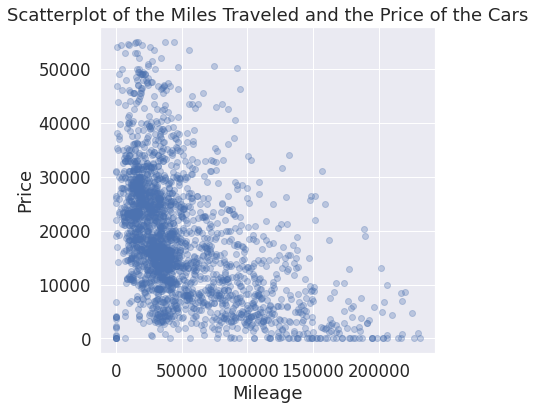

In [30]:
# scatterplot price VS. mileage on dataset new_df 
plt.figure(figsize=(6,6))
x=new_df['mileage']
y=new_df['price']

plt.scatter(x,y,alpha=0.3)
plt.title('Scatterplot of the Miles Traveled and the Price of the Cars')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [31]:
new_df.describe()

,price,mileage
count,2446.000000,2446.000000
mean,18512.107931,48921.922731
std,11275.321714,40869.473166
min,0.000000,0.000000
25%,10400.000000,21677.500000
50%,16900.000000,35336.000000
75%,25500.000000,61552.750000
max,55000.000000,231240.000000


In [32]:
new_df.corr()

,price,mileage
price,1.000000,-0.473141
mileage,-0.473141,1.000000


x = 1       190552.0
2        39590.0
3        64146.0
4         6654.0
5        45561.0
          ...   
2494     23609.0
2495     34553.0
2496     31594.0
2497     32557.0
2498     31371.0
Name: mileage, Length: 2446, dtype: float64 y = 1        2899
2        5350
3       25000
4       27700
5        5700
        ...  
2494     7800
2495     9200
2496     9200
2497     9200
2498     9200
Name: price, Length: 2446, dtype: int64
This is p: Rectangle(xy=(0, 26.75), width=1235, height=0.5, angle=0)
      fun: 836.7421349554686
 hess_inv: array([[ 6.75482573e-06, -2.16864440e-06],
       [-2.16864440e-06,  6.98149220e-07]])
      jac: array([0.        , 0.48854065])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 915
      nit: 14
     njev: 228
   status: 2
  success: False
        x: array([ 5.6652363 , -0.34290884])
[ 5.6652363  -0.34290884]


Text(0, 0.5, 'Price (log scale)')

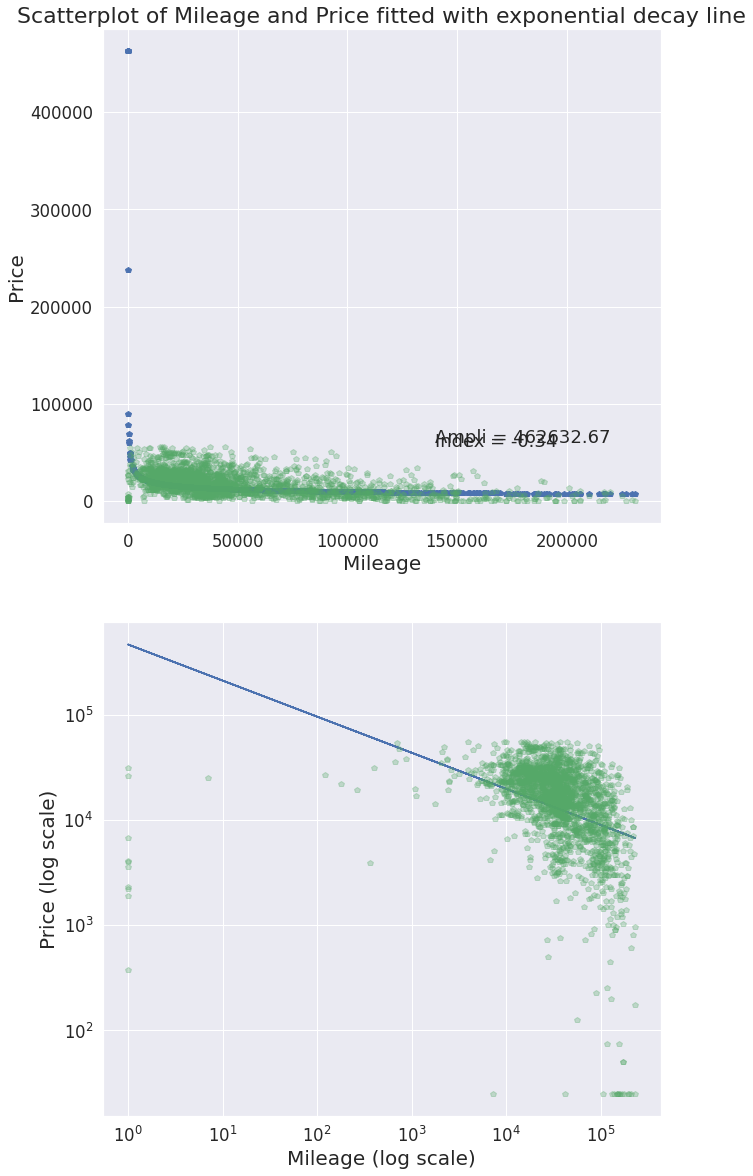

In [33]:
# fitting curve
from scipy import optimize
print(f"x = {x}", f"y = {y}")
powerlaw = lambda x, amp, index: amp * (x**index)
logx = np.log10(x+1e-3)
logy = np.log10(y+1e-3)
#logyerr = yerr / y

### Understand this and find p.
print(f"This is p: {p}")
# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x + 0.1
costfunc = lambda p,x,y: min(errfunc(p,x,y),100000)
errfunc = lambda p, x, y: np.sum(np.abs(y - fitfunc(p, x)))

pinit = [1.0, -1.0]
out = optimize.minimize(errfunc, pinit,
                       args=(logx, logy))
print(out)
pfinal = out.x
print(pfinal)
index = pfinal[1]
amp = 10.0**pfinal[0]

# Plotting data

plt.figure(figsize=(10,20))
plt.clf()
plt.subplot(2, 1, 1)
plt.plot(x, powerlaw(x, amp, index),'p')     # Fit
plt.plot(x, y,'gp',alpha=0.3)     # Fit

plt.text(140000, 60000, 'Ampli = %5.2f' % (amp),fontsize = 18)
plt.text(140000, 56000, 'Index = %5.2f' % (index),fontsize = 18)
plt.title('Scatterplot of Mileage and Price fitted with exponential decay line',fontsize = 22)
plt.xlabel('Mileage',fontsize = 20)
plt.ylabel('Price',fontsize = 20)

plt.subplot(2, 1, 2)
plt.loglog(x, powerlaw(x, amp, index))
plt.plot(x, y,'gp',alpha=0.3)     # Fit

plt.xlabel('Mileage (log scale)',fontsize = 20)
plt.ylabel('Price (log scale)',fontsize = 20)

In [34]:
# optimizing scatterplot with fitted curve

#excluding price < 100 records
low_price_index = new_df[new_df['price']<100].index  
new_df.drop(low_price_index, inplace=True)
print(new_df.shape)

#excluding mileage < 1000 records
low_mile_index = new_df[new_df['mileage']<1000].index
new_df.drop(low_mile_index, inplace=True)
new_df.shape

(2392, 2)


(2369, 2)

      fun: 494.6358751409513
 hess_inv: array([[ 2.25812999e-08, -1.73963811e-08],
       [-1.73963811e-08,  1.95187608e-08]])
      jac: array([0.16265869, 4.25458527])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 435
      nit: 14
     njev: 106
   status: 2
  success: False
        x: array([ 6.14360442, -0.4472263 ])
[ 6.14360442 -0.4472263 ]


Text(0, 0.5, 'Price (log scale)')

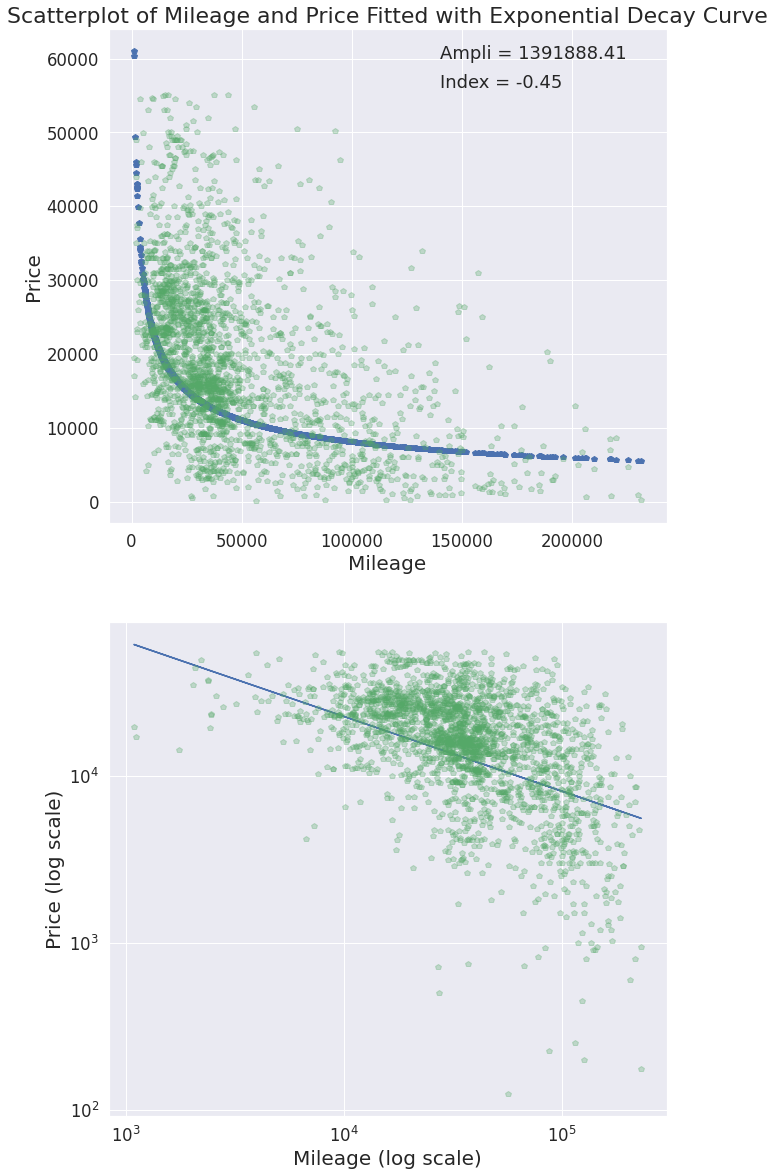

In [35]:
# fitting curve
x=new_df['mileage']
y=new_df['price']

powerlaw = lambda x, amp, index: amp * (x**index)

logx = np.log10(x+1e-3)
logy = np.log10(y+1e-3)
#logyerr = yerr / y

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x + 0.1
costfunc = lambda p,x,y: min(errfunc(p,x,y),100000)
errfunc = lambda p, x, y: np.sum(np.abs(y - fitfunc(p, x)))

pinit = [1.0, -1.0]
out = optimize.minimize(errfunc, pinit,
                       args=(logx, logy))
print(out)
pfinal = out.x
print(pfinal)

index = pfinal[1]
amp = 10.0**pfinal[0]

# Plotting data

plt.figure(figsize=(10,20))
plt.clf()
plt.subplot(2, 1, 1)
plt.plot(x, powerlaw(x, amp, index),'p')     # Fit
plt.plot(x, y,'gp',alpha=0.3)     # Fit

plt.text(140000, 60000, 'Ampli = %5.2f' % (amp),fontsize = 18)
plt.text(140000, 56000, 'Index = %5.2f' % (index),fontsize = 18)
plt.title('Scatterplot of Mileage and Price Fitted with Exponential Decay Curve',fontsize = 22)
plt.xlabel('Mileage',fontsize = 20)
plt.ylabel('Price',fontsize = 20)

plt.subplot(2, 1, 2)
plt.loglog(x, powerlaw(x, amp, index))
plt.plot(x, y,'gp',alpha=0.3)     # Fit

plt.xlabel('Mileage (log scale)',fontsize = 20)
plt.ylabel('Price (log scale)',fontsize = 20)

Q3. How does the color of the car affect the price?

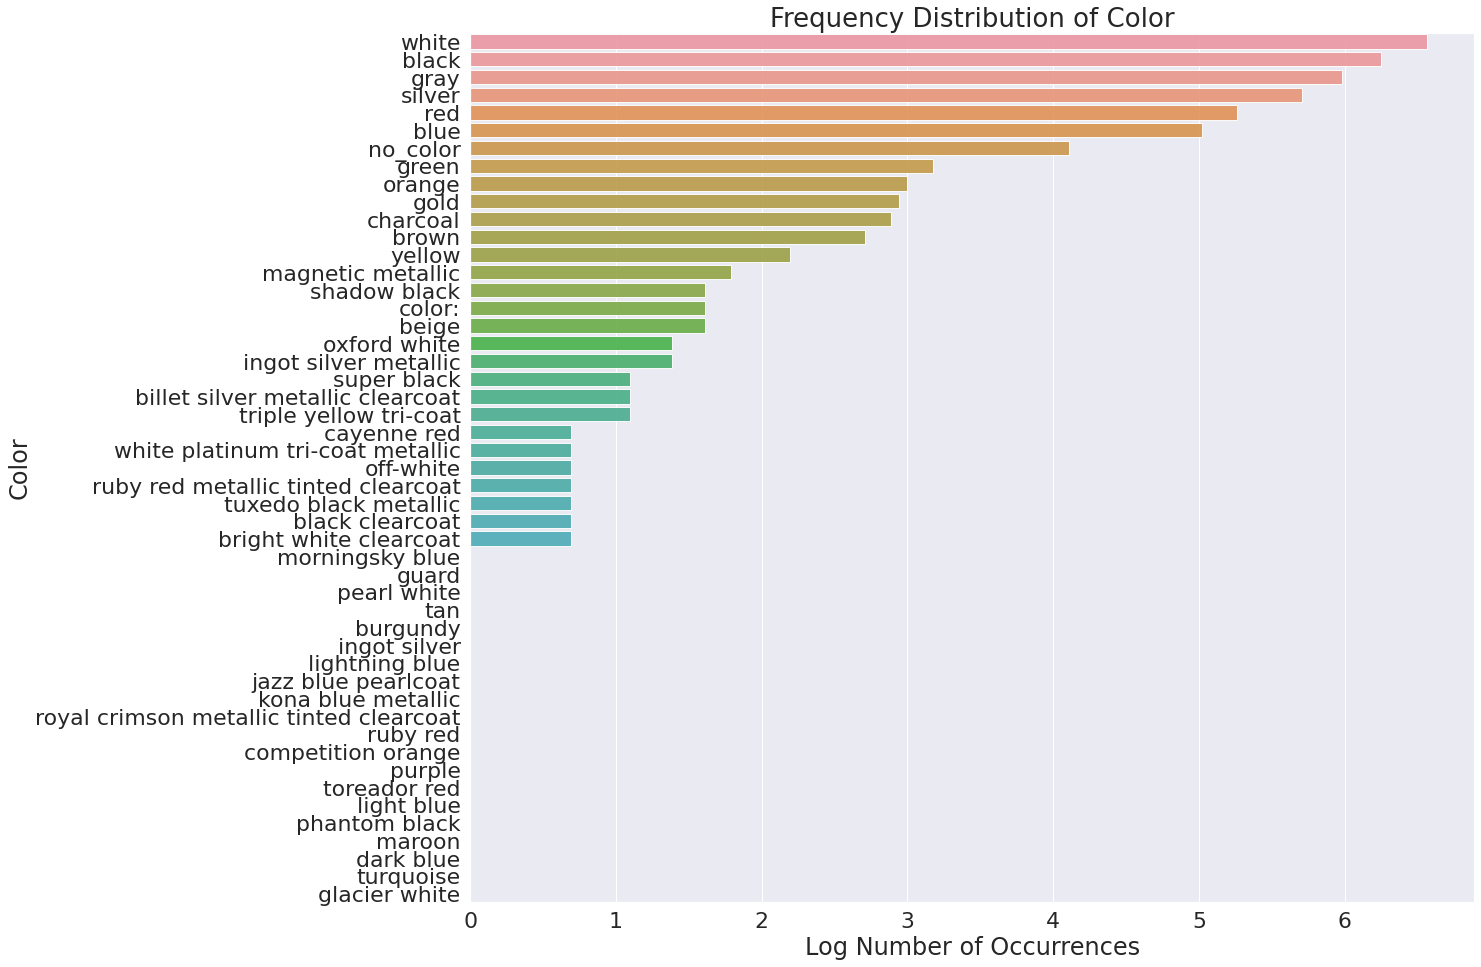

In [36]:
#Plotting color frequency
color_count = df_cat['color'].value_counts()
plt.figure(figsize=(18,16))
sns.set(style="darkgrid")

sns.barplot(np.log(color_count.values),color_count.index, alpha=0.9)
plt.title('Frequency Distribution of Color',fontsize=26)
plt.xlabel('Log Number of Occurrences', fontsize=24)

plt.ylabel('Color', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

In [37]:
df_cat['color'].value_counts()  #counting records in different colors

white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    61
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
shadow black                                 5
color:                                       5
beige                                        5
oxford white                                 4
ingot silver metallic                        4
super black                                  3
billet silver metallic clearcoat             3
triple yellow

In [38]:
color_at_least_three=color_count['white':'super black']
color_index=list(color_at_least_three.index)

In [39]:
df_price_color = df_car[['color','price']] #creating subset with only 'color' and 'price' columns 
df_price_color.head()

,color,price
0,black,6300
1,silver,2899
2,silver,5350
3,blue,25000
4,red,27700


In [40]:
df_price_color_newindex=df_price_color.loc[df_price_color['color'].isin(color_index)] #selecting colors with at least three records
df_price_color_newindex.count()

color    2459
price    2459
dtype: int64

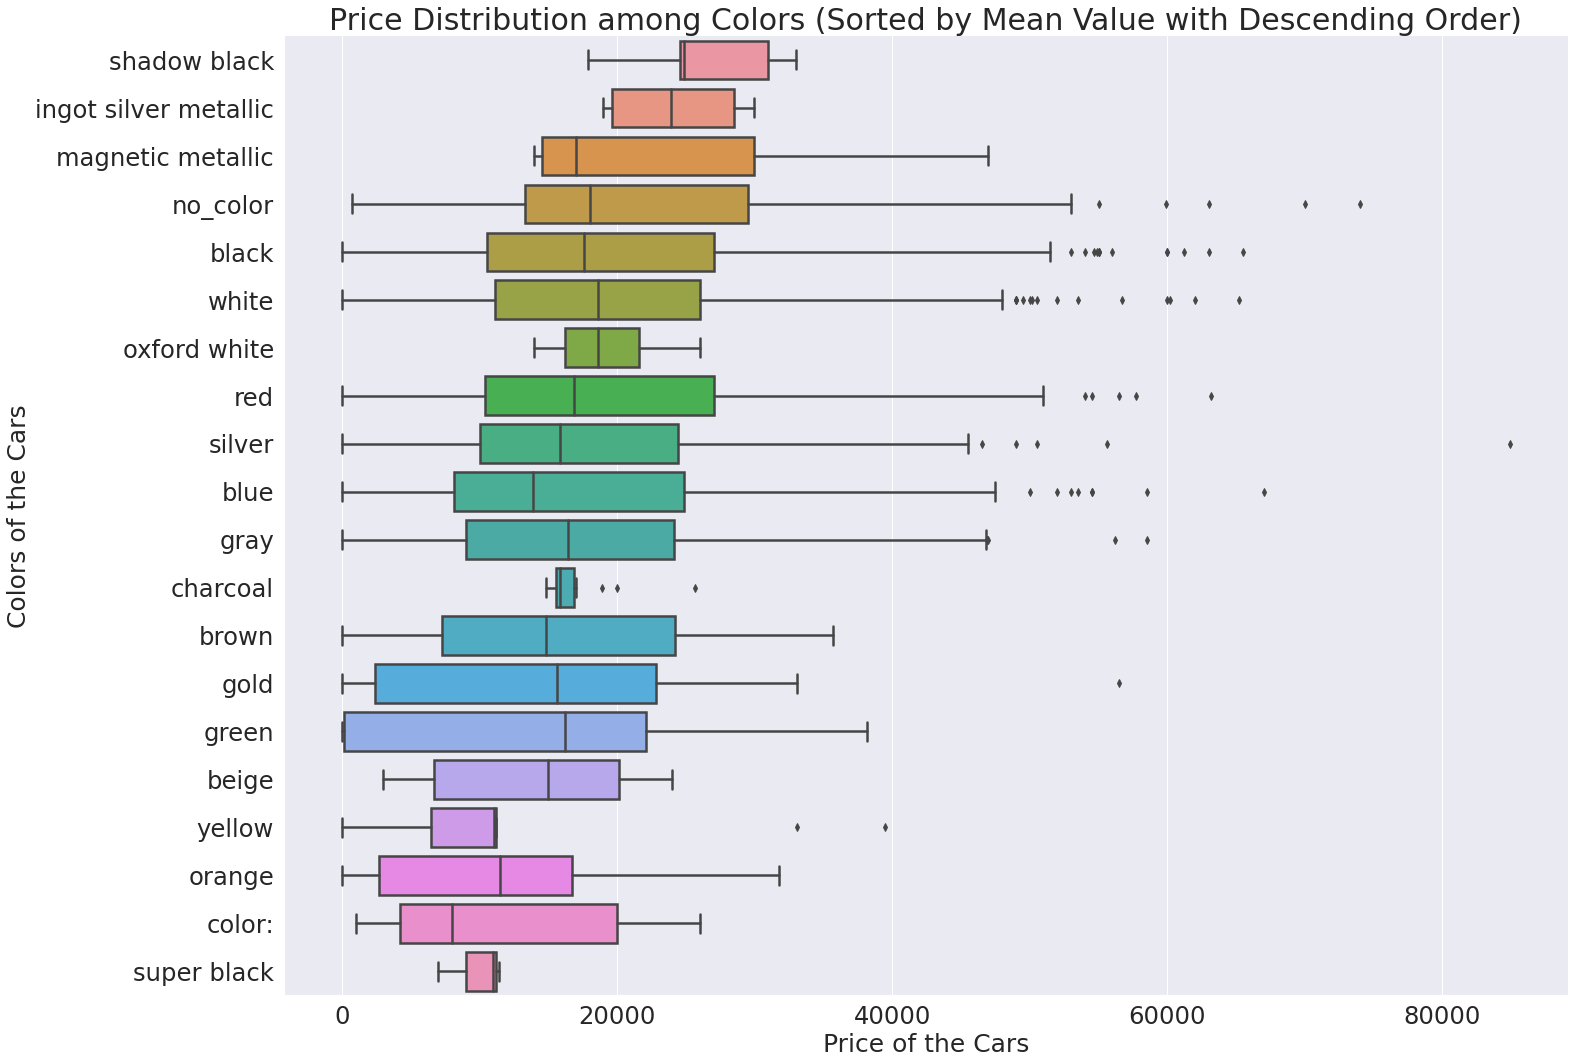

In [41]:
# Boxplotting price in each color group with mean value desending order
sort_index=list(df_price_color_newindex.groupby(['color']).mean().sort_values(by='price',ascending=False).index)

sns.set(font_scale=2.2)
sns.catplot(y="color",     
            x="price", 
            kind="box", 
            height=15, 
            aspect=1.5,
            linewidth=2.5,
            order=sort_index,
            data=df_price_color_newindex)

plt.title('Price Distribution among Colors (Sorted by Mean Value with Descending Order)',size=30) #setting title
sns.set(style="darkgrid") #setting background style

plt.ylabel('Colors of the Cars', fontsize=25) #setting ylable
plt.xlabel('Price of the Cars', fontsize=25)  #setting xlable
plt.show()

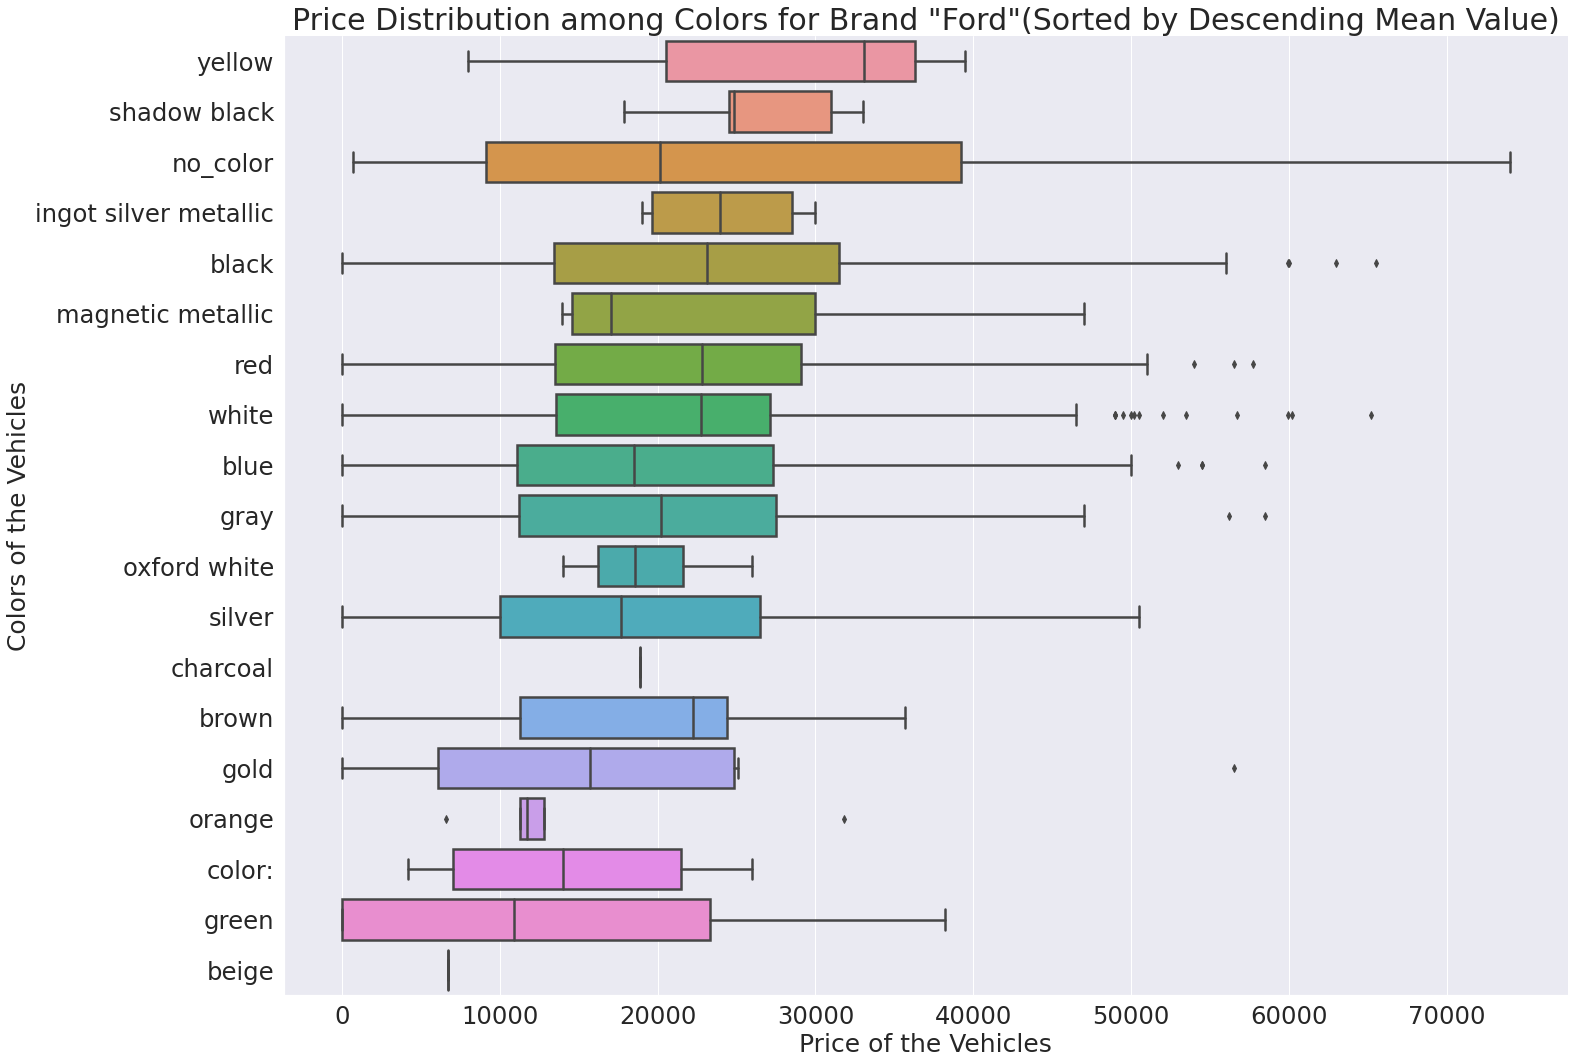

In [42]:
#boxplotting ford_car_price in different color groups with mean_price descending order
df_brand_price_color=df_car[['brand','price','color']] #subsetting
df_brand_price_color_newindex=df_brand_price_color.loc[df_brand_price_color['color'].isin(color_index)]

df_ford=df_brand_price_color_newindex.loc[df_brand_price_color['brand'] == 'ford'] # making subset of data for records in brand = 'ford'
sort_index=list(df_ford.groupby(['color']).mean().sort_values(by='price',ascending=False).index)

sns.set(font_scale=2.2)
sns.catplot(y="color",
            x="price", 
            kind="box", 
            height=15, 
            aspect=1.5,
            linewidth=2.5,
            order=sort_index,
            data=df_ford)

plt.title('Price Distribution among Colors for Brand "Ford"(Sorted by Descending Mean Value)',size=30)
sns.set(style="darkgrid")
plt.ylabel('Colors of the Vehicles', fontsize=25)
plt.xlabel('Price of the Vehicles', fontsize=25)
plt.show()

# Modelling

In [43]:
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Model_One: linear regression model considering only numerical variables

In [44]:
df_car.drop(df_car.loc[df_car['converted_condition']== -1].index, inplace=True) #deleting rows where 'condition' = -1

In [45]:
df_car.shape

(2479, 14)

In [ ]:
#Response variable 'price', explainatory variables 'mileage','year','converted_condition'   
X_exp_m1 = df_car[['year', 'mileage','converted_condition']] #subsetting explainatory variables
y_resp_m1 = df_car['price'] #subsetting response variable

In [ ]:
type(X_exp_m1), type(y_resp_m1)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
#calling train_test_split to allocate train and test sets
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_exp_m1, y_resp_m1, test_size = .30, random_state=42)
    
#fitting linear regression model 
lm_model_one =LinearRegression(normalize=True) 
lm_model_one.fit(X_train_m1, y_train_m1) 

y_test_preds_m1 = lm_model_one.predict(X_test_m1) # test set prediction
r_test_m1 = r2_score(y_test_m1, y_test_preds_m1) # r score of test set 

print("test r2 score lm_model_one: ",r_test_m1)

test r2 score lm_model_one:  0.20879527472358383


In [ ]:
y_test_m1[:5]

1766    13000
259     13270
1935    31000
1007    16400
56      20000
Name: price, dtype: int64

In [ ]:
y_test_preds_m1[:5]

array([17148.42501364, 16450.30245704, 22993.36065364, 22518.4733476 ,
       21648.12824476])

In [ ]:
# Converting the y_test_pred from float to int.
y_test_preds_m1 = y_test_preds_m1.astype(int)

In [ ]:
type(y_test_m1), type(y_test_preds_m1)

(pandas.core.series.Series, numpy.ndarray)

In [ ]:
# Converting y_test_m1 from Series to numpy ndarray
y_test_m1 = y_test_m1.to_numpy()
type(y_test_m1), len(y_test_m1)

(numpy.ndarray, 744)

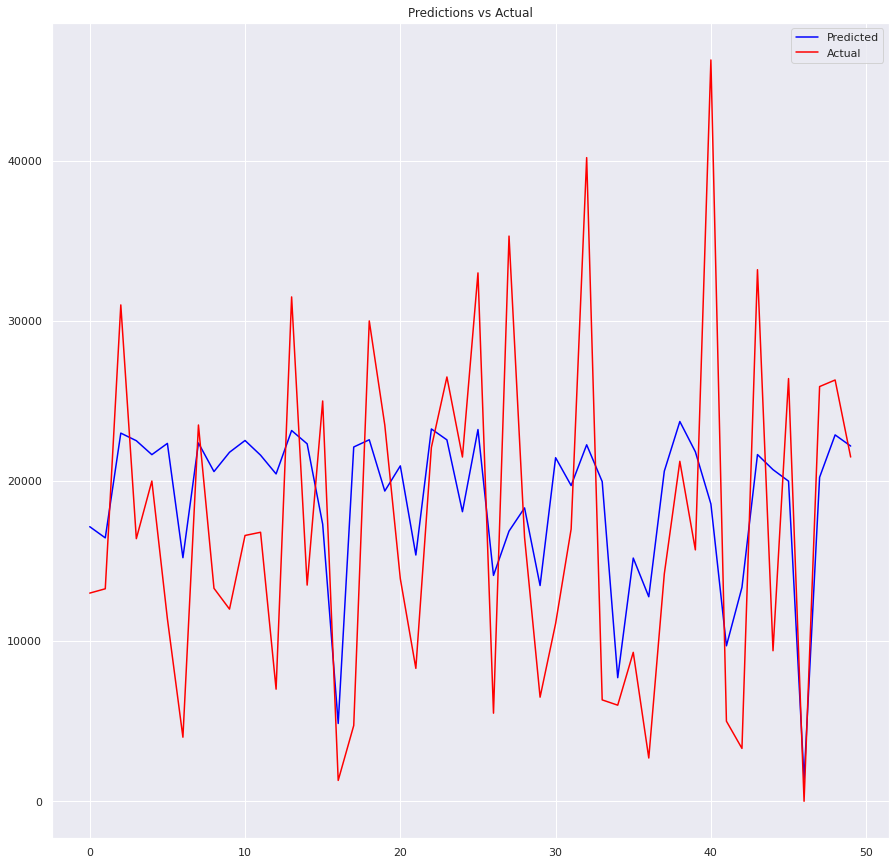

In [ ]:
plt.figure(figsize=(15, 15))
plt.plot(y_test_preds_m1[0:50], label='Predicted', color="blue")  # Plot some data on the (implicit) axes.
plt.plot(y_test_m1[0:50], label='Actual', color="red")  # etc.
plt.title("Predictions vs Actual")
plt.legend()

## Model_Two: ElasticNet considering only numerical variables

In [ ]:
#Response variable 'price', explainatory variables 'mileage','year','converted_condition'   
X_exp_m2 = df_car[['year', 'mileage','converted_condition']] #subsetting explainatory variables
y_resp_m2 = df_car['price'] #subsetting response variable

X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_exp_m2, y_resp_m2, test_size = .30, random_state=42)

In [ ]:
# model: ElasticNet

#eleven steps:
for alpha in [1e-8,1e-7,1e-6,0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    #Instantiate
    lm_two =ElasticNet(normalize=True,alpha=alpha) 
    lm_two.fit(X_train_m2, y_train_m2) 
    
    y_test_preds_m2 = lm_two.predict(X_test_m2)# Predictions here
    r_test_m2 = r2_score(y_test_m2, y_test_preds_m2) # Rsquared here
    
    print("alpha=",alpha)
    print("test r2 score of lm_two:",r_test_m2)
    print()


alpha= 1e-08
test r2 score of lm_two: 0.20879561486875753

alpha= 1e-07
test r2 score of lm_two: 0.20879867518075546

alpha= 1e-06
test r2 score of lm_two: 0.20882918181724897

alpha= 1e-05
test r2 score of lm_two: 0.20912472804195648

alpha= 0.0001
test r2 score of lm_two: 0.21122811848742962

alpha= 0.001
test r2 score of lm_two: 0.19560705198947448

alpha= 0.01
test r2 score of lm_two: 0.06370079607368306

alpha= 0.1
test r2 score of lm_two: 0.003424495215682666

alpha= 1
test r2 score of lm_two: -0.004378949309699953

alpha= 10
test r2 score of lm_two: -0.005181577424064665

alpha= 100
test r2 score of lm_two: -0.005262211127102567



In [ ]:
type(y_test_preds_m2), type(y_test_m2)

(numpy.ndarray, pandas.core.series.Series)

In [ ]:
# Converting the y_test_pred from float to int.
y_test_preds_m2 = y_test_preds_m2.astype(int)

In [ ]:
# Converting y_test_m1 from Series to numpy ndarray
y_test_m2 = y_test_m2.to_numpy()
type(y_test_m2), len(y_test_m2)

(numpy.ndarray, 744)

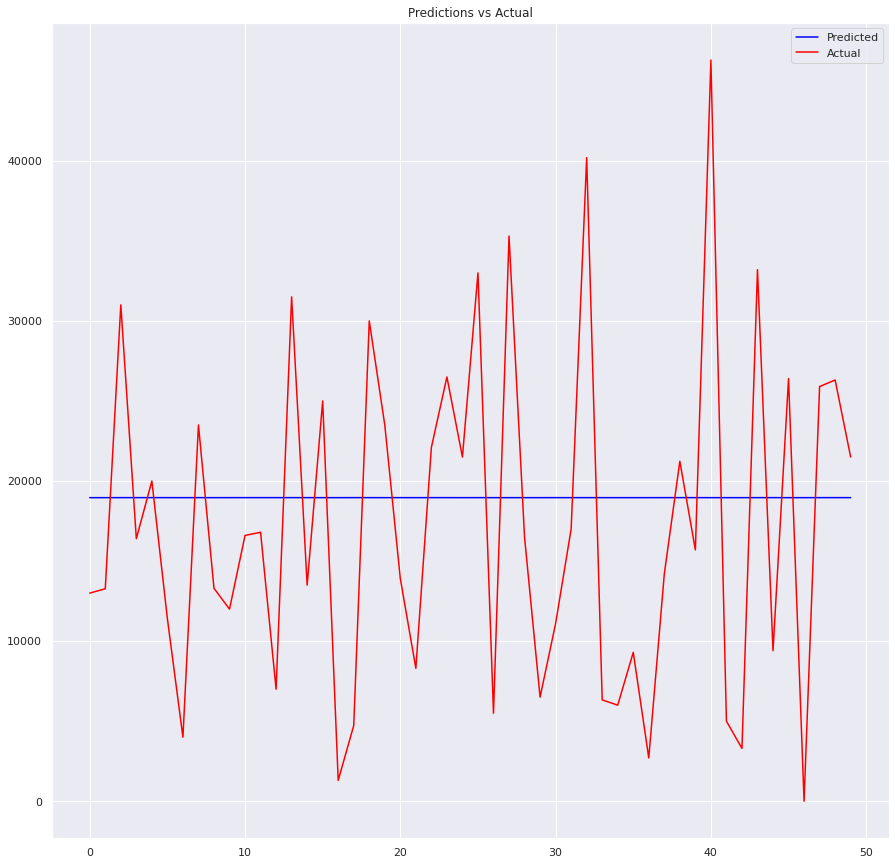

In [ ]:
plt.figure(figsize=(15, 15))
plt.plot(y_test_preds_m2[0:50], label='Predicted', color="blue")  # Plot some data on the (implicit) axes.
plt.plot(y_test_m2[0:50], label='Actual', color="red")  # etc.
plt.title("Predictions vs Actual")
plt.legend()

## ElasticNet model considering all numeric and categorical variables

In [ ]:
#esteblishing subset with only object variables
df_cat=df_car.select_dtypes(include='object')
df_cat.columns

Index(['brand', 'model', 'title_status', 'color', 'vin', 'state', 'country',
       'condition'],
      dtype='object')

In [ ]:
#  the count of distinct values within the categorical features
for column in ['brand', 'model', 'title_status', 'color', 'state', 'country']:
    print(column,df_cat[column].value_counts().count())

brand 28
model 127
title_status 2
color 49
state 44
country 2


In [ ]:
df_cat_replace=df_cat.copy()

In [ ]:
# cat variables encoding with numeric values
for column in ['brand', 'model', 'title_status', 'color', 'state', 'country']:
    labels = df_cat_replace[column].astype('category').cat.categories.tolist()
    replace_map_comp = {column: {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    
    df_cat_replace[column].replace(replace_map_comp[column], inplace=True)
    #print(replace_map_comp)

    #print(df_cat_replace.head())

df_cat_replace.head()    

,brand,model,title_status,color,vin,state,country,condition
0,28,26,1,3,jtezu11f88k007763,25,2,10 days left
1,9,93,1,40,2fmdk3gc4bbb02217,36,2,6 days left
2,8,76,1,40,3c4pdcgg5jt346413,8,2,2 days left
3,9,33,1,5,1ftfw1et4efc23745,40,2,22 hours left
4,6,1,1,35,3gcpcrec2jg473991,7,2,22 hours left


In [ ]:
df_car.update(df_cat_replace)
df_car.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,converted_condition
0,0,6300,28,26,2008,1,274117.0,3,jtezu11f88k007763,159348797,25,2,10 days left,14400
1,1,2899,9,93,2011,1,190552.0,40,2fmdk3gc4bbb02217,166951262,36,2,6 days left,8640
2,2,5350,8,76,2018,1,39590.0,40,3c4pdcgg5jt346413,167655728,8,2,2 days left,2880
3,3,25000,9,33,2014,1,64146.0,5,1ftfw1et4efc23745,167753855,40,2,22 hours left,1320
4,4,27700,6,1,2018,1,6654.0,35,3gcpcrec2jg473991,167763266,7,2,22 hours left,1320


In [ ]:
df_car.drop(df_car.loc[df_car['converted_condition']== -1].index, inplace=True) #deleting rows where 'condition' = -1
df_car.shape

(2479, 14)

In [ ]:
# Consider both numerical and categorical variables

X_exp_m3 = df_car[['year', 'mileage','brand', 'model', 'title_status', 'color', 'state', 'country','converted_condition']]
y_resp_m3 = df_car['price']

X_train_m3, X_test_m3, y_train_m3, y_test_m3 = train_test_split(X_exp_m3, y_resp_m3, test_size = .30, random_state=42)

#fitting linear regression model
# model: ElasticNet

#eleven steps:
for alpha in [1e-8,1e-7,1e-6,0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    #Instantiate
    lm_three =ElasticNet(normalize=True,alpha=alpha) 
    lm_three.fit(X_train_m3, y_train_m3) 
    
    y_test_preds_m3 = lm_three.predict(X_test_m3)# Predictions here
    r_test_m3 = r2_score(y_test_m3, y_test_preds_m3) # Rsquared here
    
    # y_train_preds_m3 = lm_three.predict(X_train_m3)
    # r_train_m3 = r2_score(y_train_m3, y_train_preds_m3)

    # Print r2 to see result
    
    print("alpha=",alpha)
    print("test r2 score of lm_three:",r_test_m3)
    # print("train r2 scoreof lm_three:",r_train_m3)
    print()
lm_three.coef_

alpha= 1e-08
test r2 score of lm_three: 0.29276756260284764

alpha= 1e-07
test r2 score of lm_three: 0.29276799230411643

alpha= 1e-06
test r2 score of lm_three: 0.2927722098364348

alpha= 1e-05
test r2 score of lm_three: 0.2928065532037021

alpha= 0.0001
test r2 score of lm_three: 0.2924664321084668

alpha= 0.001
test r2 score of lm_three: 0.26319149015021814

alpha= 0.01
test r2 score of lm_three: 0.09366235077062224

alpha= 0.1
test r2 score of lm_three: 0.007697738450440417

alpha= 1
test r2 score of lm_three: -0.003936589937017176

alpha= 10
test r2 score of lm_three: -0.005140022572814873

alpha= 100
test r2 score of lm_three: -0.0052602599659747895



array([ 9.24383378e-03, -6.13005064e-07, -1.23445145e-03,  0.00000000e+00,
       -1.03611427e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00])

In [ ]:
# Converting the y_test_pred from float to int.
y_test_preds_m3 = y_test_preds_m3.astype(int)

In [ ]:
# Converting y_test_m1 from Series to numpy ndarray
y_test_m3 = y_test_m3.to_numpy()
type(y_test_m3), len(y_test_m3)

(numpy.ndarray, 744)

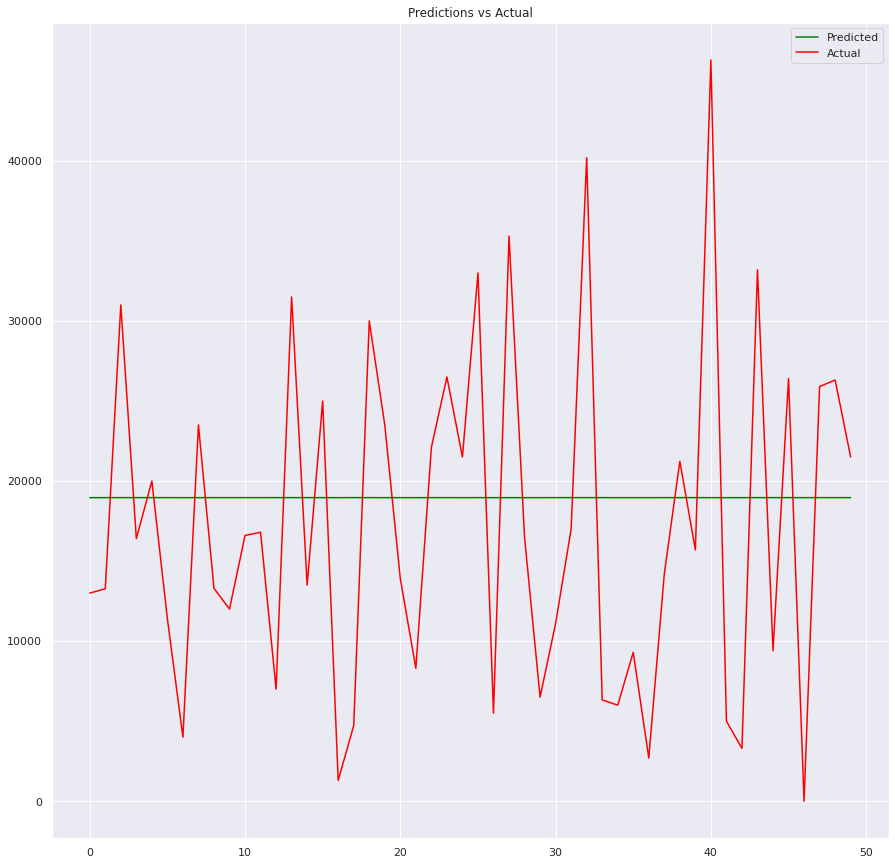

In [ ]:
plt.figure(figsize=(15, 15))
plt.plot(y_test_preds_m3[0:50], label='Predicted', color="green")  # Plot some data on the (implicit) axes.
plt.plot(y_test_m3[0:50], label='Actual', color="red")  # etc.
plt.title("Predictions vs Actual")
plt.legend()

## ElasticNet: categorical variables with One hot encoding

In [46]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [ ]:
#one-hot encoding
df_sub = df_car[['year','mileage','brand', 'model', 'title_status', 'color', 'state', 'country','converted_condition']]
df_sub = create_dummy_df(df_sub,['brand', 'model', 'title_status', 'color', 'state', 'country',],dummy_na=False)

In [ ]:
df_sub.shape

(2479, 249)

In [ ]:
# fitting ElasticNet on one-hot encoded dataset
X_exp4 = df_sub
y_resp4 = df_car['price']

X_train_m4, X_test_m4, y_train_m4, y_test_m4 = train_test_split(X_exp4, y_resp4, test_size = .30, random_state=42)

#ten steps:

#Instantiate
for alpha in [1e-7,1e-6,0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
    lm_four = ElasticNet(normalize=True,alpha=alpha) 
    lm_four.fit(X_train_m4, y_train_m4) 

    y_test_preds_m4 = lm_four.predict(X_test_m4)# Predictions here
    y_train_preds_m4 = lm_four.predict(X_train_m4)# Predictions here
    r_test = r2_score(y_test_m4, y_test_preds_m4) # Rsquared here
    r_train = r2_score(y_train_m4, y_train_preds_m4)

    # Print r2 to see result
    print("alpha=",alpha)
    print("test r2 score of lm_four",r_test)
    print("train r2 score of lm_four",r_train)
    print()

alpha= 1e-07
test r2 score of lm_four 0.6750403823849752
train r2 score of lm_four 0.753142971417869

alpha= 1e-06
test r2 score of lm_four 0.6773733935888917
train r2 score of lm_four 0.753111137526182

alpha= 1e-05
test r2 score of lm_four 0.6767797518871488
train r2 score of lm_four 0.7522059327871315

alpha= 0.0001
test r2 score of lm_four 0.6758493070140617
train r2 score of lm_four 0.7456021497494445

alpha= 0.001
test r2 score of lm_four 0.5988061609159203
train r2 score of lm_four 0.6409578644272089

alpha= 0.01
test r2 score of lm_four 0.22133590997798624
train r2 score of lm_four 0.23300208119568844

alpha= 0.1
test r2 score of lm_four 0.02571645047923199
train r2 score of lm_four 0.03151847787542761

alpha= 1
test r2 score of lm_four -0.0020842151092088645
train r2 score of lm_four 0.0032290131086385454

alpha= 10
test r2 score of lm_four -0.004981239530189141
train r2 score of lm_four 0.00028567432654946767

alpha= 100
test r2 score of lm_four -0.00525719784489409
train r2 

In [ ]:
type(y_test_preds_m4), type(y_test_m4), len(y_test_preds_m4), len(y_test_m4)

(numpy.ndarray, pandas.core.series.Series, 744, 744)

In [ ]:
# Converting the y_test_pred from float to int.
y_test_preds_m4 = y_test_preds_m4.astype(int)

In [ ]:
# Converting y_test_m1 from Series to numpy ndarray
y_test_m4 = y_test_m4.to_numpy()
type(y_test_m4), len(y_test_m4)

(numpy.ndarray, 744)

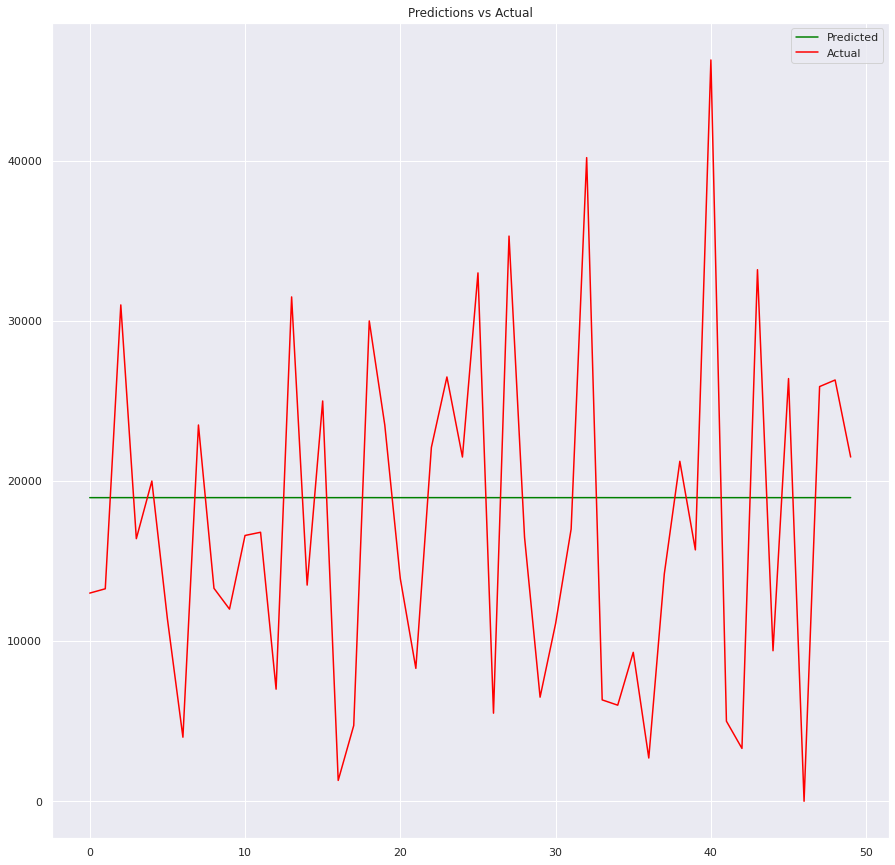

In [ ]:
plt.figure(figsize=(15, 15))
plt.plot(y_test_preds_m4[0:50], label='Predicted', color="green")  # Plot some data on the (implicit) axes.
plt.plot(y_test_m4[0:50], label='Actual', color="red")  # etc.
plt.title("Predictions vs Actual")
plt.legend()

## Modelling with XGBoost

In [47]:
import xgboost as xgb

In [48]:
df_car_xgb = df_car[['year','mileage','brand', 'model', 'title_status', 'color', 'state', 'country','converted_condition']]
df_car_xgb = create_dummy_df(df_car_xgb,['brand', 'model', 'title_status', 'color', 'state', 'country'],dummy_na=False)

In [49]:
df_car_xgb.shape

(2479, 249)

In [50]:
df_car_xgb.head()

,year,mileage,converted_condition,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,state_tennessee,state_texas,state_utah,state_vermont,state_virginia,state_washington,state_west virginia,state_wisconsin,state_wyoming,country_ usa
0,2008,274117.0,14400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2011,190552.0,8640,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2018,39590.0,2880,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2014,64146.0,1320,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2018,6654.0,1320,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# cols_to_norm = ['year','mileage']
# df_sub[cols_to_norm] = df_car_xgb[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [51]:
df_car_xgb.head()

,year,mileage,converted_condition,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,state_tennessee,state_texas,state_utah,state_vermont,state_virginia,state_washington,state_west virginia,state_wisconsin,state_wyoming,country_ usa
0,2008,274117.0,14400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2011,190552.0,8640,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2018,39590.0,2880,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2014,64146.0,1320,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2018,6654.0,1320,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
X_exp5 = df_car_xgb
y_resp5 = df_car['price']

X_train_m5, X_test_m5, y_train_m5, y_test_m5 = train_test_split(X_exp5, y_resp5, test_size = .30, random_state=42)

In [53]:
type(X_train_m5), type(y_train_m5)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train_m5, y_train_m5)]
model_five = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model_five, parameters)

clf.fit(X_train_m5, y_train_m5)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

KeyboardInterrupt: ignored

In [ ]:
# fit model on training data
# model_five = xgb.XGBRegressor(learning_rate = 0.01, n_estimators = 1000, max_depth = 10)  
# model_five.fit(X_train_m5, y_train_m5)

[12:02:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, max_depth=10, n_estimators=1000)

In [ ]:
# make predictions for test data
y_pred = model_five.predict(X_test_m5)

In [ ]:
y_test_preds_m5 = model_five.predict(X_test_m5)# # make predictions for test data
y_train_preds_m5 = model_five.predict(X_train_m5)# # make predictions for train data

r_test = r2_score(y_test_m5, y_test_preds_m5) # r2 of test data
r_train = r2_score(y_train_m5, y_train_preds_m5) #r2 of train data

# Print r2 to see result
print("train r2 score of lm_five",r_train)
print("test r2 score of lm_five",r_test)


train r2 score of lm_five 0.8502054518065194
test r2 score of lm_five 0.6723117264668711


Before
1. train r2 score of lm_five 0.9193352168443149
2. test r2 score of lm_five 0.7223125534254315

In [ ]:
# Converting the y_test_pred from float to int.
y_test_preds_m5 = y_test_preds_m5.astype(int)

In [ ]:
# Converting y_test_m1 from Series to numpy ndarray
y_test_m5 = y_test_m5.to_numpy()
type(y_test_m5), len(y_test_m5)

(numpy.ndarray, 744)

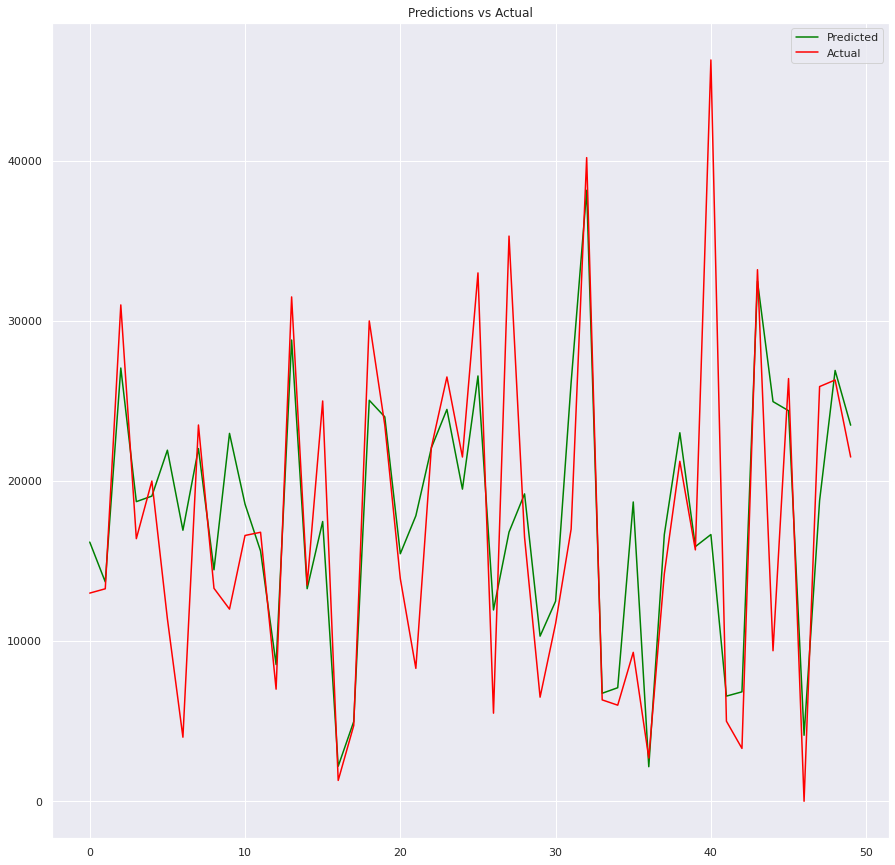

In [ ]:
plt.figure(figsize=(15, 15))
plt.plot(y_test_preds_m5[0:50], label='Predicted', color="green")  # Plot some data on the (implicit) axes.
plt.plot(y_test_m5[0:50], label='Actual', color="red")  # etc.
plt.title("Predictions vs Actual")
plt.legend()
# y_test_preds[:5]

## Modelling using Random Forest

In [ ]:
df_car.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,converted_condition
0,0,6300,28,26,2008,1,274117.0,3,jtezu11f88k007763,159348797,25,2,10 days left,14400
1,1,2899,9,93,2011,1,190552.0,40,2fmdk3gc4bbb02217,166951262,36,2,6 days left,8640
2,2,5350,8,76,2018,1,39590.0,40,3c4pdcgg5jt346413,167655728,8,2,2 days left,2880
3,3,25000,9,33,2014,1,64146.0,5,1ftfw1et4efc23745,167753855,40,2,22 hours left,1320
4,4,27700,6,1,2018,1,6654.0,35,3gcpcrec2jg473991,167763266,7,2,22 hours left,1320


In [ ]:
df_car.applymap(type).apply(pd.value_counts).fillna(0)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,converted_condition
<class 'int'>,2479.0,2479.0,2479.0,2479.0,2479.0,2479.0,0.0,2479.0,0.0,2479.0,2479.0,2479.0,0.0,2479.0
<class 'float'>,0.0,0.0,0.0,0.0,0.0,0.0,2479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<class 'str'>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2479.0,0.0,0.0,0.0,2479.0,0.0


In [ ]:
# cols_to_norm = ["brand", "model", "year", "title_status", "mileage", "color", "state", "price"]
# df_car[cols_to_norm] = df_car[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
## Preprocess data
X = df_car.iloc[:, [1,2,3,4,5,6,7]].values  # input columns are: brand, model, year, title_status, mileage, color, state
y = df_car.iloc[:, 0].values # output columns are: price


In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
#Encoding text columns
print('Input row before encoding:', X[0])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X[:,1]=le.fit_transform(X[:,1]) 
X[:,3]=le.fit_transform(X[:,3])
X[:,5]=le.fit_transform(X[:,5])
X[:,6]=le.fit_transform(X[:,6])
X[:,0]=le.fit_transform(X[:,0])

print('Input row after encoding:', X[0])

Input row before encoding: [6300 28 26 2008 1 274117.0 3]
Input row after encoding: [166 27 26 17 1 2405 2]


In [ ]:
# Split dataset into train and test
X_train_m6, X_test_m6, y_train_m6, y_test_m6 = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 2000, random_state = 42, oob_score=True)
regressor.fit(X_train_m6, y_train_m6)

y_test_pred_m6 = regressor.predict(X_test_m6)

In [ ]:
type(X_train_m6)

numpy.ndarray

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_m6, y_test_pred_m6)

0.725343983051391

In [ ]:
type(y_test_m6), type(y_test_pred_m6)

(numpy.ndarray, numpy.ndarray)

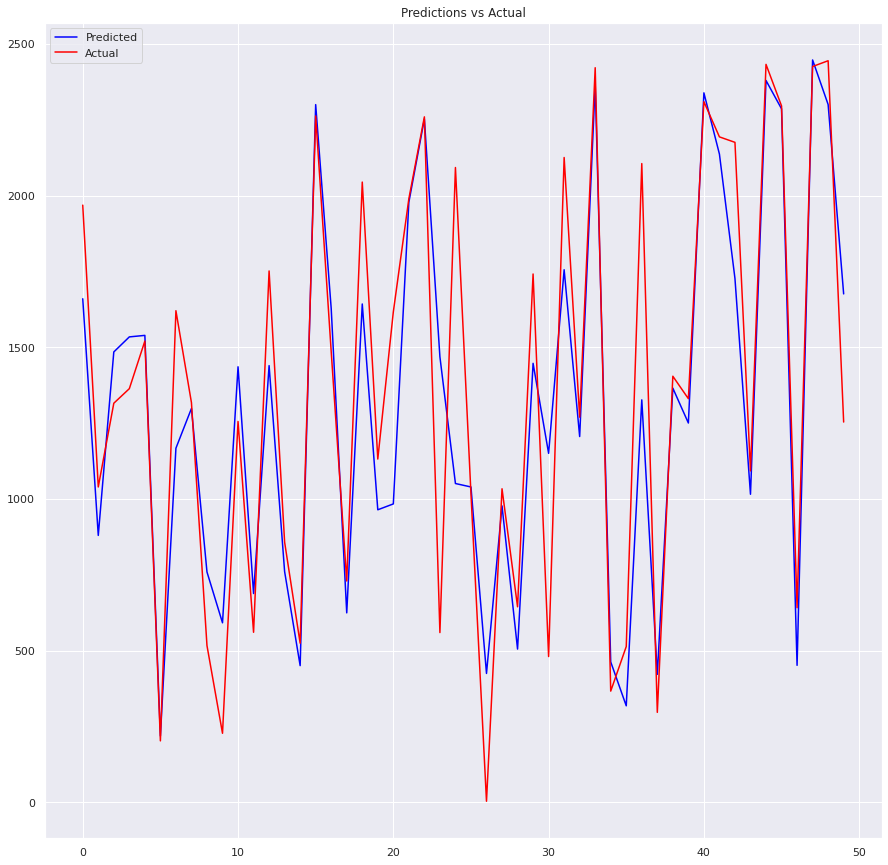

In [ ]:
plt.figure(figsize=(15, 15))
plt.plot(y_test_pred_m6[0:50], label='Predicted', color="blue")  # Plot some data on the (implicit) axes.
plt.plot(y_test_m6[0:50], label='Actual', color="red")  # etc.
plt.title("Predictions vs Actual")
plt.legend()

TODO:
1. Print the accuracy
2. Plot the graph of actual and predicted values
3. Understand all the function and r2 score.